In [1]:
import scanpy as sc
print(f"scanpy version: {sc.__version__}")
import scvi
print(f"scvi version: {scvi.__version__}")
import scib
print(f"scib version: {scib.__version__}")

scanpy version: 1.9.3


Global seed set to 0


scvi version: 0.20.3
scib version: 1.1.4


In [2]:
adata=sc.read_h5ad('/disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/Raw/adata.h5ad')

In [3]:
adata_bbknn=sc.read_h5ad('/disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/bbknn/adata.h5ad')
adata_combat=sc.read_h5ad('/disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/combat/adata.h5ad')
adata_fastmnn=sc.read_h5ad('/disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/FastMNN/adata.h5ad')
adata_harmnoy=sc.read_h5ad('/disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/harmony/adata.h5ad')
adata_scanorama=sc.read_h5ad('/disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scanorama/adata.h5ad')
adata_scvi=sc.read_h5ad('/disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scVI/adata.h5ad')
adata_seurat=sc.read_h5ad('/disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/Seurat_v3/adata.h5ad')

/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [23]:
adata_harmnoy

AnnData object with n_obs × n_vars = 15277 × 15455
    obs: 'nCount_RNA', 'nFeature_RNA', 'Lineage', 'batch', 'leiden', 'louvain'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'leiden', 'louvain', 'neighbors', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [4]:
adata.obsm['X_bbknn']=adata_bbknn.obsm['X_bbknn']
adata.obsm['X_combat']=adata_combat.obsm['X_combat']
adata.obsm['X_FastMNN']=adata_fastmnn.obsm['X_FastMNN']
adata.obsm['X_harmony']=adata_harmnoy.obsm['X_harmony']
adata.obsm['X_scanorama']=adata_scanorama.obsm['X_scanorama']
adata.obsm['X_scVI']=adata_scvi.obsm['X_scVI']
adata.obsm['X_Seurat_v3']=adata_seurat.obsm['X_Seurat_v3']

In [15]:
adata

AnnData object with n_obs × n_vars = 15277 × 2000
    obs: 'doublet_scores', 'predicted_doublets', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Lineage', 'project', 'batch', 'louvain'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches', 'mean', 'std'
    uns: 'Lineage_colors', 'batch_colors', 'hvg', 'leiden', 'log1p', 'louvain', 'neighbors', 'pca', 'project_colors', 'umap'
    obsm: 'X_Raw', 'X_pca', 'X_umap', 'X_bbknn', 'X_combat', 'X_FastMNN', 'X_harmnoy', 'X_scanorama', 'X_scVI', 'X_Seurat_v3'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
from scib_metrics.benchmark import Benchmarker
bm = Benchmarker(
    adata,
    batch_key="batch",
    label_key="Lineage",
    embedding_obsm_keys=["X_Raw", "X_bbknn", "X_harmony",'X_FastMNN',
                         'X_scanorama','X_scVI','X_Seurat_v3','X_combat'],
    n_jobs=8,
)
bm.benchmark()

/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.d

INFO     Endothelial lineage consists of a single batch or is too small. Skip.                                     
INFO     Mesenchymal lineage consists of a single batch or is too small. Skip.                                     


/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Embeddings:  12%|█▎        | 1/8 [00:22<02:38, 22.71s/it]

INFO     Endothelial lineage consists of a single batch or is too small. Skip.                                     
INFO     Mesenchymal lineage consists of a single batch or is too small. Skip.                                     


/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Embeddings:  25%|██▌       | 2/8 [00:39<01:56, 19.39s/it]

INFO     Endothelial lineage consists of a single batch or is too small. Skip.                                     
INFO     Mesenchymal lineage consists of a single batch or is too small. Skip.                                     


Embeddings:  38%|███▊      | 3/8 [01:00<01:38, 19.80s/it]

INFO     Endothelial lineage consists of a single batch or is too small. Skip.                                     
INFO     Mesenchymal lineage consists of a single batch or is too small. Skip.                                     


Embeddings:  50%|█████     | 4/8 [01:43<01:55, 28.99s/it]

INFO     Endothelial lineage consists of a single batch or is too small. Skip.                                     
INFO     Mesenchymal lineage consists of a single batch or is too small. Skip.                                     


Embeddings:  62%|██████▎   | 5/8 [02:54<02:12, 44.28s/it]

INFO     Endothelial lineage consists of a single batch or is too small. Skip.                                     
INFO     Mesenchymal lineage consists of a single batch or is too small. Skip.                                     


Embeddings:  75%|███████▌  | 6/8 [03:11<01:10, 35.09s/it]

INFO     Endothelial lineage consists of a single batch or is too small. Skip.                                     
INFO     Mesenchymal lineage consists of a single batch or is too small. Skip.                                     


Embeddings:  88%|████████▊ | 7/8 [03:28<00:29, 29.10s/it]

INFO     Endothelial lineage consists of a single batch or is too small. Skip.                                     
INFO     Mesenchymal lineage consists of a single batch or is too small. Skip.                                     


/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Embeddings: 100%|██████████| 8/8 [03:45<00:00, 28.15s/it]


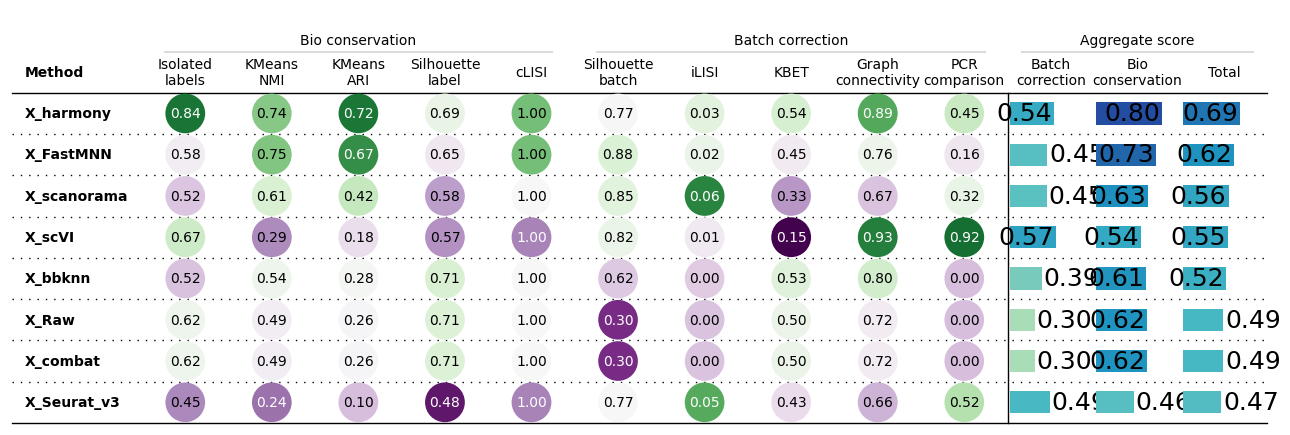

In [8]:
bm.plot_results_table(min_max_scale=False,save_dir='/disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scib_redo')

### 选取代表性数据重做

In [23]:
import pandas as pd

In [24]:
adata1=sc.read_10x_mtx('/disk191_3/AnalysisPipline/Pig/2_SingleCellRNA/PRJNA728441/NSP1/outs/filtered_feature_bc_matrix')
adata2=sc.read_10x_mtx('/disk191_3/AnalysisPipline/Pig/2_SingleCellRNA/PRJNA806770/Bama/Bama/outs/filtered_feature_bc_matrix')

In [25]:
scrublets=pd.read_csv('/disk191_3/AnalysisPipline/Pig/2_SingleCellRNA/PRJNA728441/NSP1/outs/filtered_feature_bc_matrix/doublet.txt',index_col='barcode')
adata1.obs['doublet_scores']=scrublets['doublet_scores']
adata1.obs['predicted_doublets']=scrublets['predicted_doublets']
x=['{}','NSP']
adata1.obs.index=adata1.obs.index.map('_'.join(x).format)  #每个barcode后加上sample名

In [26]:
scrublets=pd.read_csv('/disk191_3/AnalysisPipline/Pig/2_SingleCellRNA/PRJNA806770/Bama/Bama/outs/filtered_feature_bc_matrix/doublet.txt',index_col='barcode')
adata2.obs['doublet_scores']=scrublets['doublet_scores']
adata2.obs['predicted_doublets']=scrublets['predicted_doublets']
x=['{}','bama']
adata2.obs.index=adata2.obs.index.map('_'.join(x).format)  #每个barcode后加上sample名

In [27]:
ap={}
ap['NSP']=adata1
ap['bama']=adata2

In [28]:
for i in ['NSP','bama']:
    ap[f'{i}'].obs["project"]="PRJNA728441"
for i in ['bama']:
    ap[f'{i}'].obs["project"]="PRJNA806770"

In [29]:
adata=sc.concat(ap.values(),keys=ap.keys(),label='sample')
adata

AnnData object with n_obs × n_vars = 13259 × 21691
    obs: 'doublet_scores', 'predicted_doublets', 'project', 'sample'

In [30]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata.var['mt'] = adata.var_names.str.startswith('MT')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

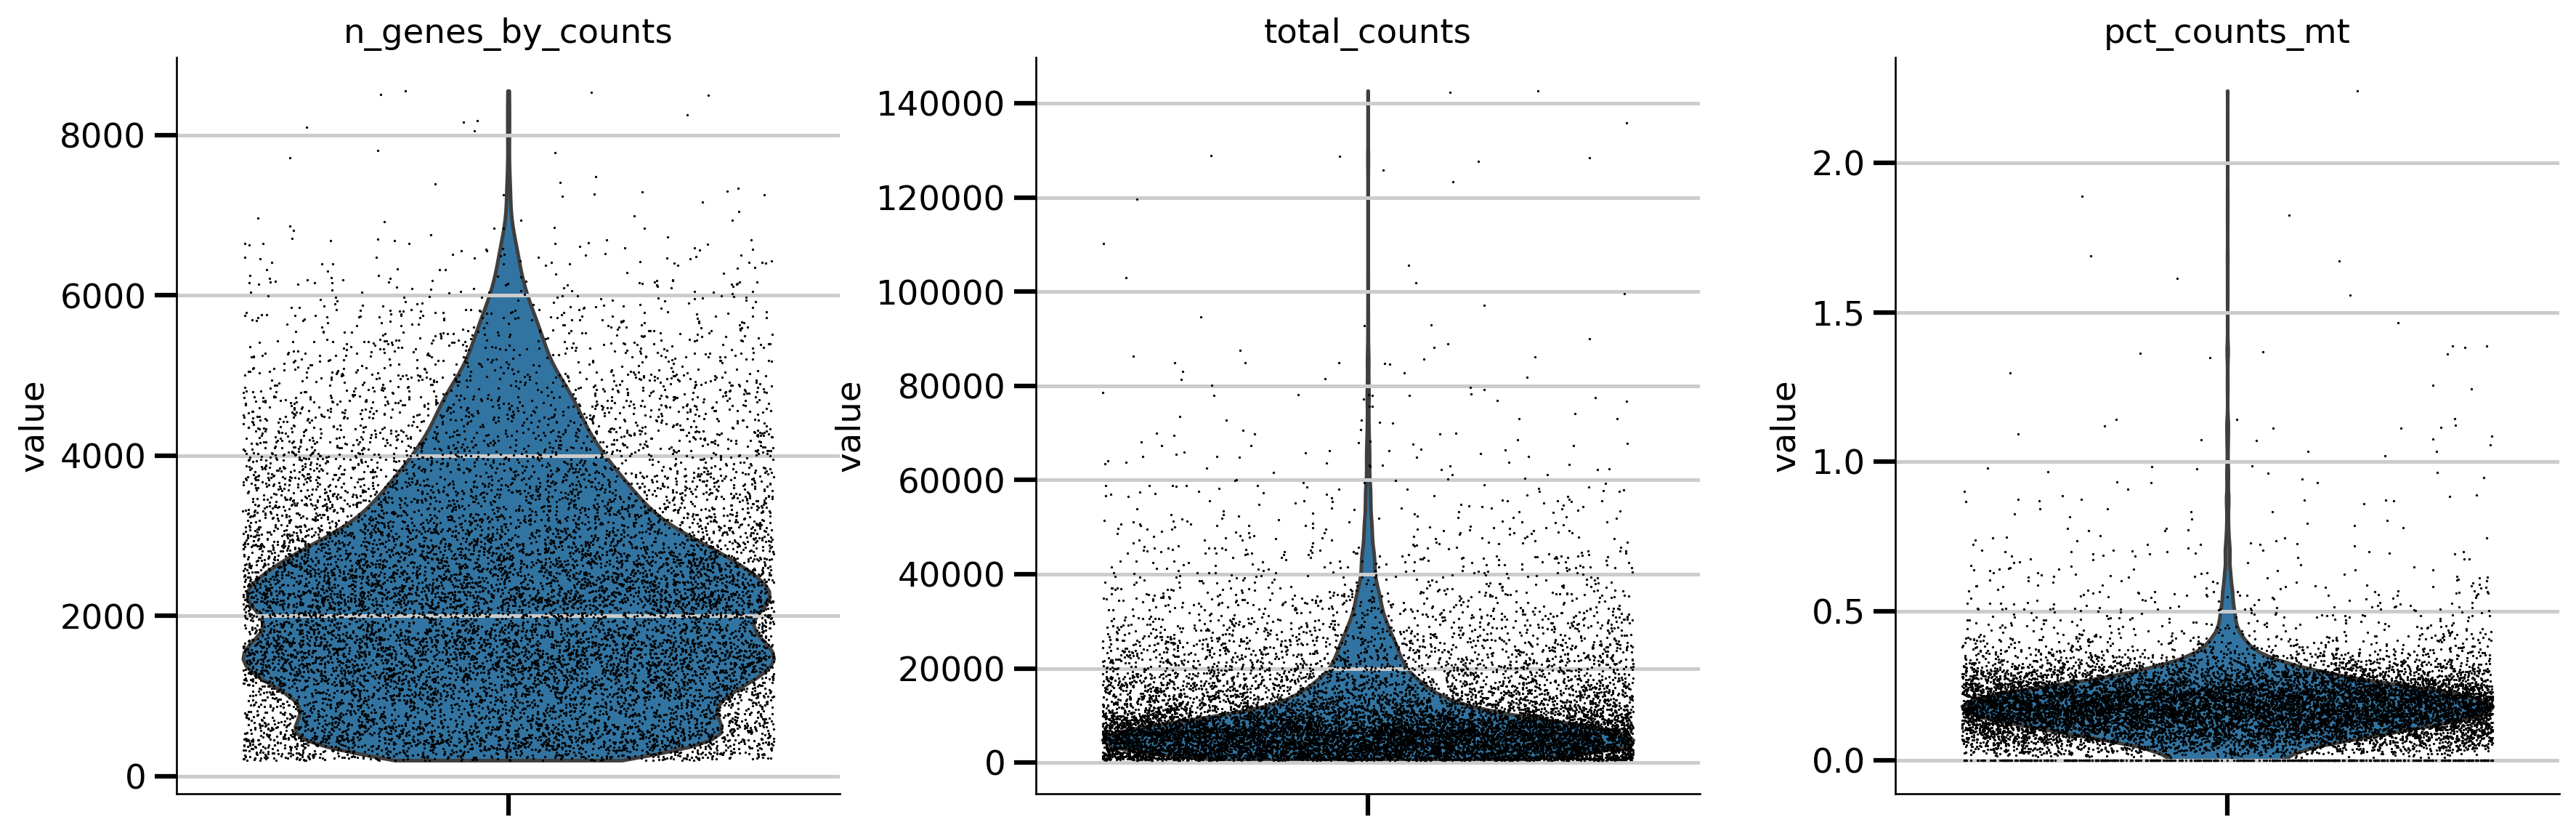

In [31]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [32]:
adata = adata[adata.obs.n_genes_by_counts < 7500, :]
adata = adata[adata.obs.n_genes_by_counts > 200, :]
adata = adata[adata.obs.pct_counts_mt < 0.5, :]
adata = adata[adata.obs.predicted_doublets==False, :]
adata

View of AnnData object with n_obs × n_vars = 12237 × 16878
    obs: 'doublet_scores', 'predicted_doublets', 'project', 'sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [33]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)  
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

adata.raw = adata
adata = adata[:, adata.var.highly_variable]
# adata = adata.raw.to_adata()

In [34]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)

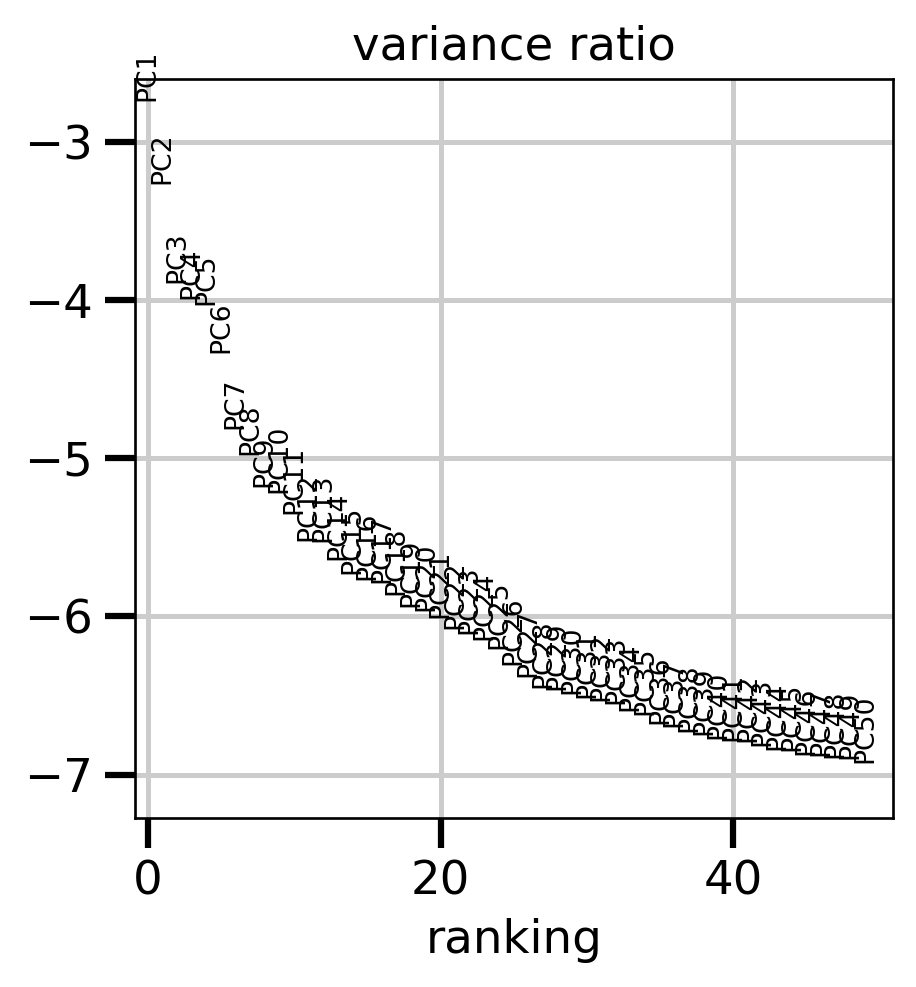

In [35]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

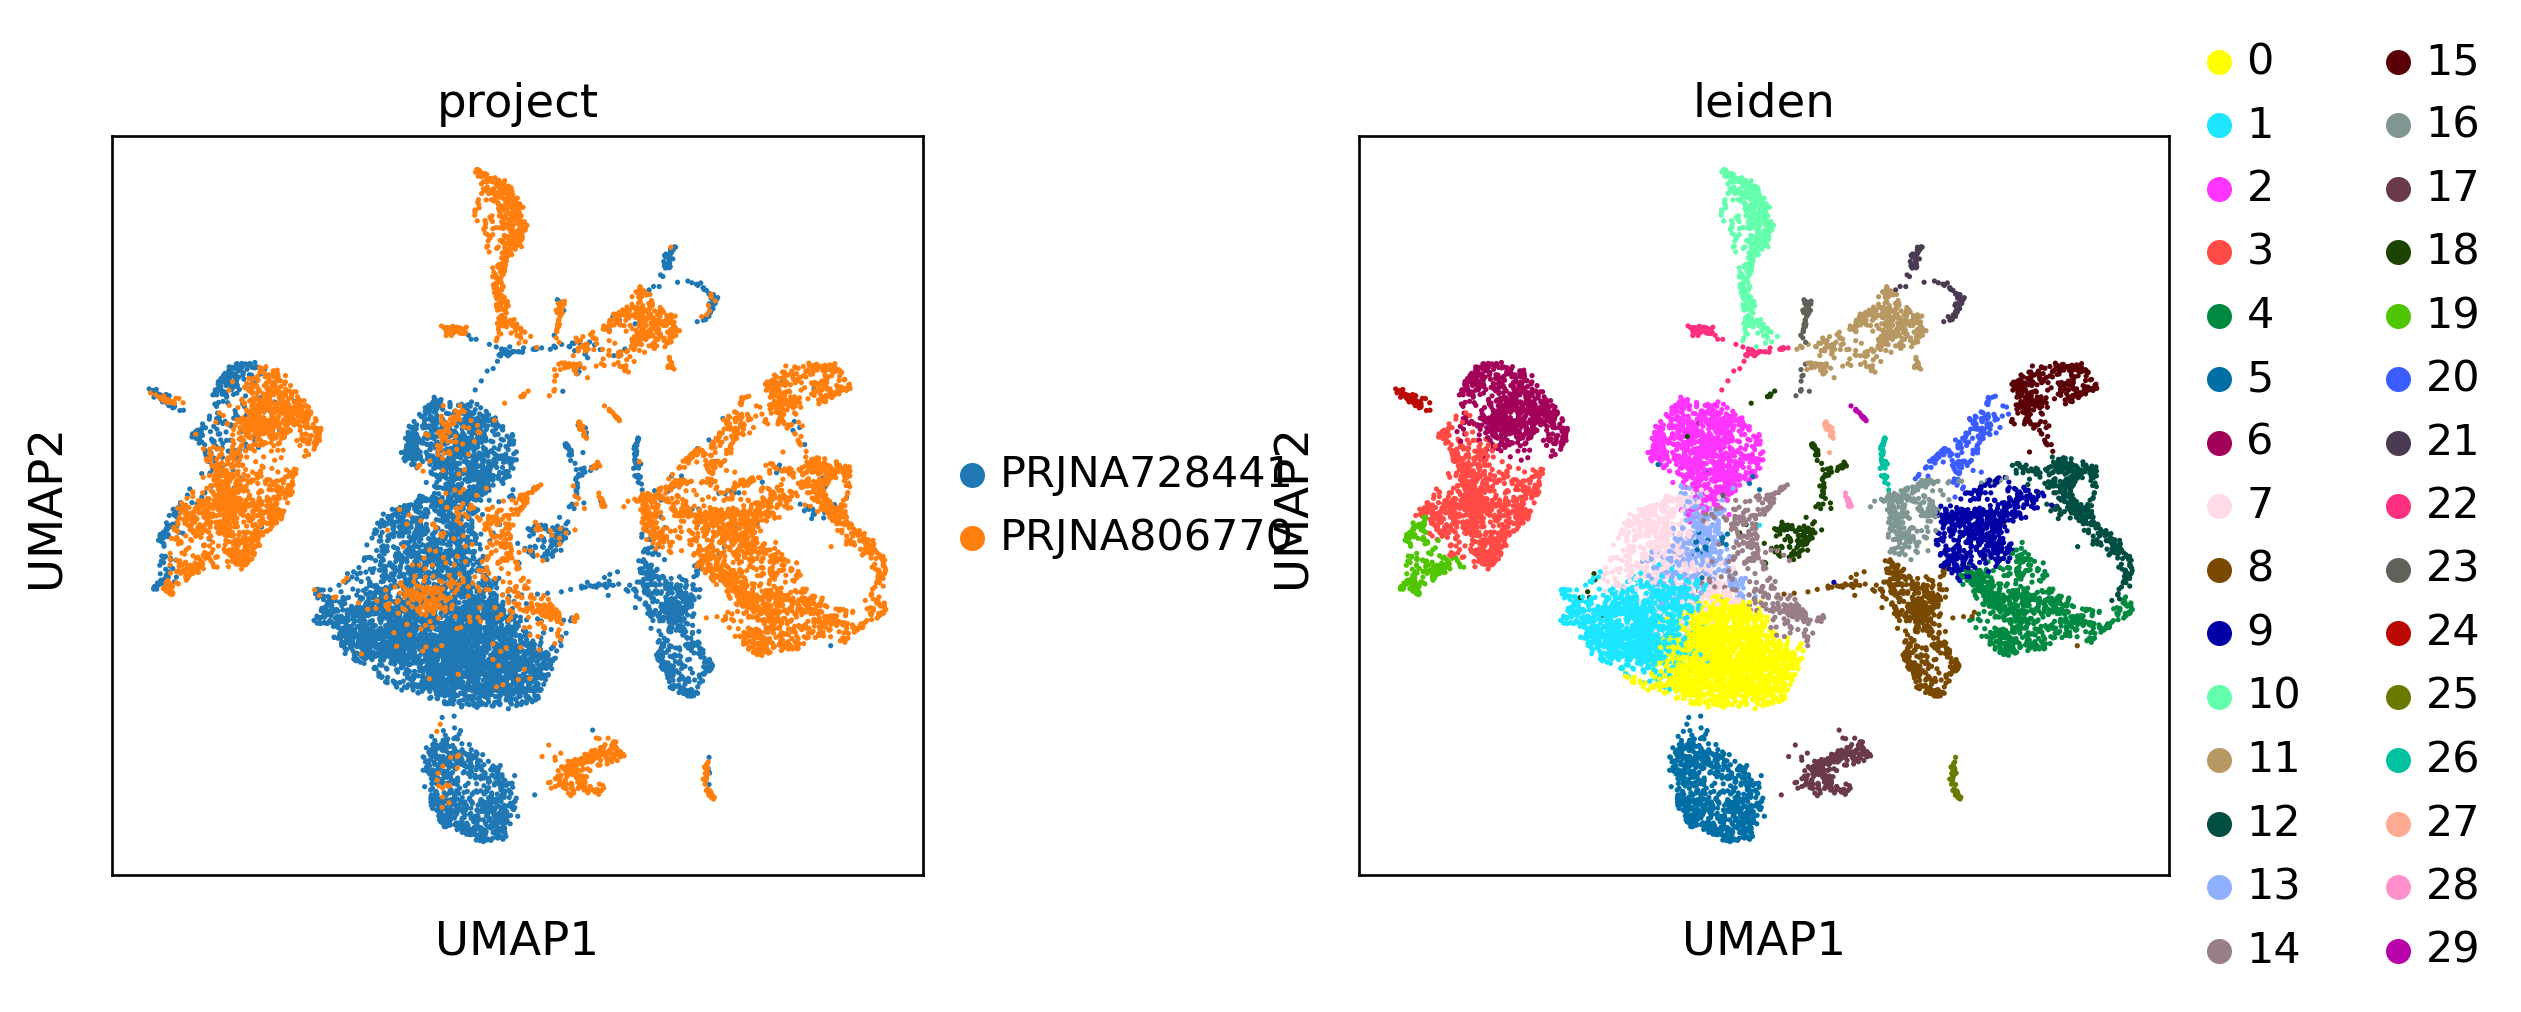

In [36]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata,color=['project','leiden'],wspace=0.4)

In [38]:
import celltypist
predictions = celltypist.annotate(adata, model = '/disk212/yupf/database/scRNA-seq/paperdata/1_atlas/Lineage.pkl', majority_voting = True,over_clustering='leiden')
adata = predictions.to_adata()

👀 Invalid expression matrix in `.X`, expect log1p normalized expression to 10000 counts per cell; will try the `.raw` attribute
🔬 Input data has 12237 cells and 16878 genes
🔗 Matching reference genes in the model
🧬 2033 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🗳️ Majority voting the predictions
✅ Majority voting done!


In [39]:
adata.obs['celltype']=adata.obs['majority_voting']
adata.obs['batch']=adata.obs['project']

In [48]:
adata

AnnData object with n_obs × n_vars = 12237 × 16878
    obs: 'doublet_scores', 'predicted_doublets', 'project', 'sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'celltype', 'batch'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'project_colors', 'leiden_colors', 'batch_colors', 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

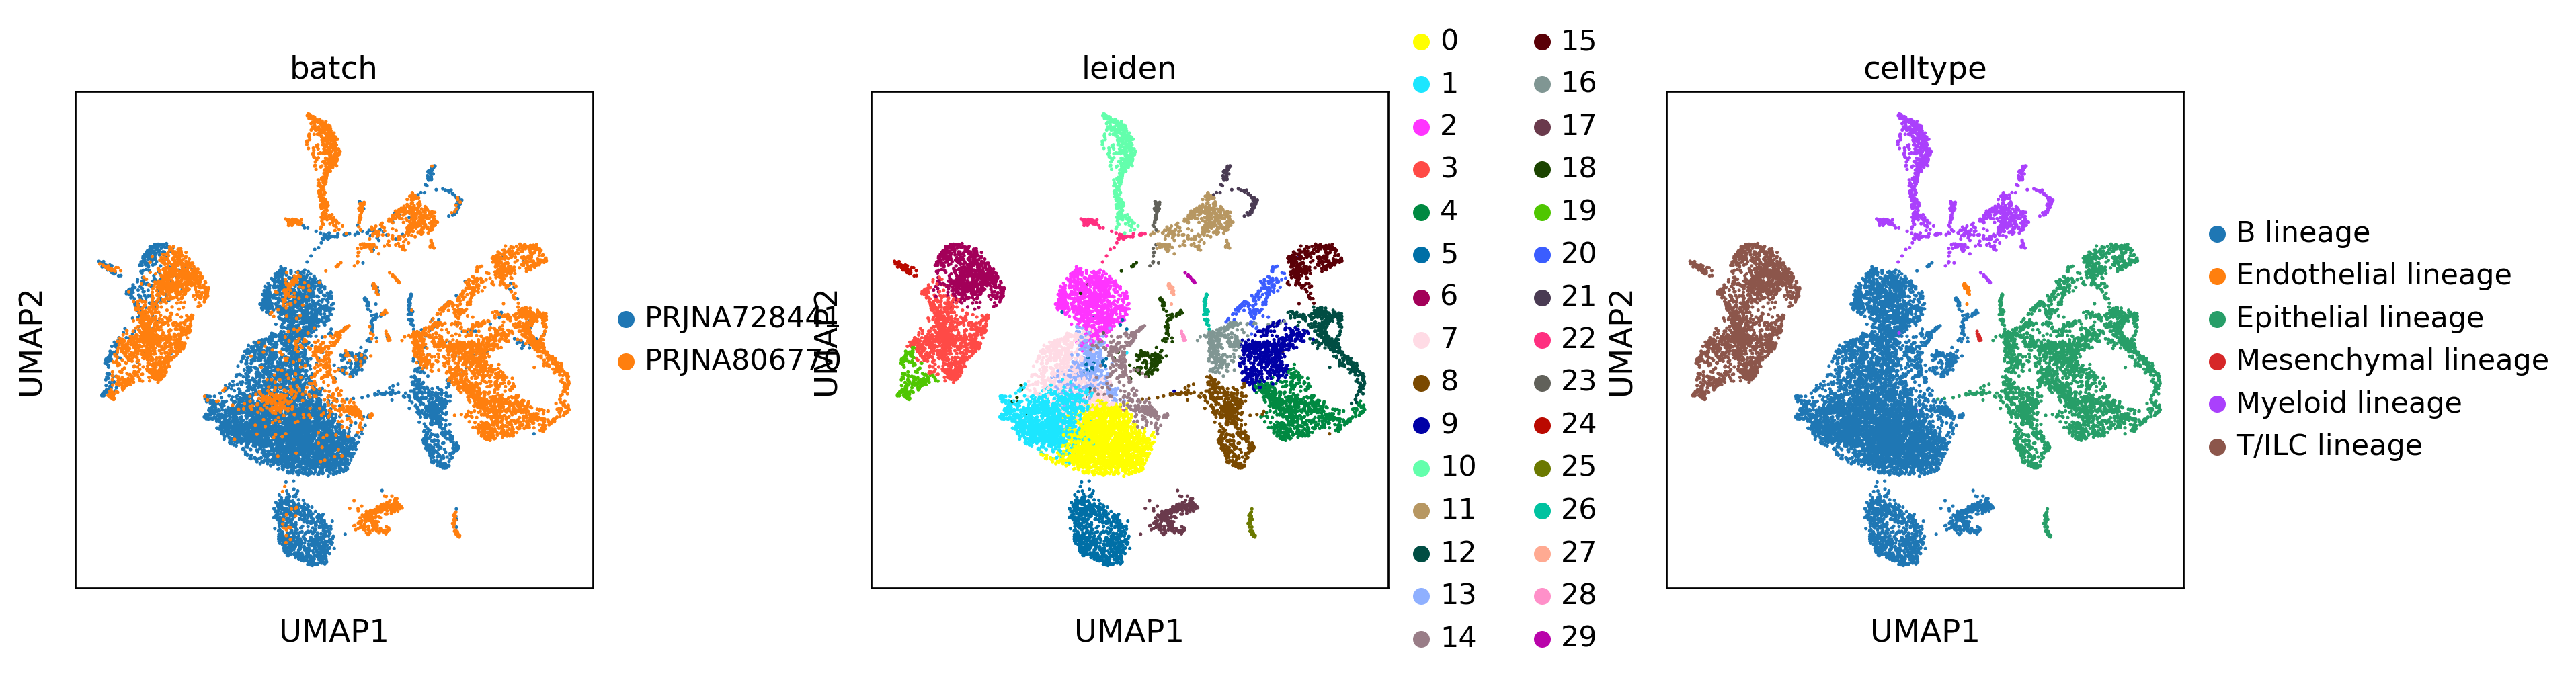

In [41]:
sc.pl.umap(adata,color=['batch','leiden','celltype'],wspace=0.4)

In [47]:
adata = adata.raw.to_adata()

In [49]:
adata.write('/disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scib_redo/adata.h5ad')

In [2]:
import omicverse as ov

In [3]:
# adata.write('/disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scib_redo/adata.h5ad')
adata=sc.read_h5ad('/disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scib_redo/adata.h5ad')

In [4]:
#存放原始数据
ov.utils.store_layers(adata,layers='counts')

#归一化/高可变基因筛选
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',
                       n_HVGs=3000,batch_key='batch')
adata

......The X of adata have been stored in counts
Begin robust gene identification
After filtration, 16878/16878 genes are kept. Among 16878 genes, 15814 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
End of size normalization: shiftlog and HVGs selection pearson


AnnData object with n_obs × n_vars = 12237 × 15814
    obs: 'doublet_scores', 'predicted_doublets', 'project', 'sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'celltype', 'batch'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'dispersions', 'dispersions_norm', 'percent_cells', 'robust', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features'
    uns: 'batch_colors', 'celltype_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'project_colors', 'umap', 'layers_counts'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [5]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable_features]

In [ ]:
adata

...Begin using combat to correct batch effect


[<AxesSubplot: title={'center': 'project'}, xlabel='X_mde_combat1', ylabel='X_mde_combat2'>,
 <AxesSubplot: title={'center': 'celltype'}, xlabel='X_mde_combat1', ylabel='X_mde_combat2'>]

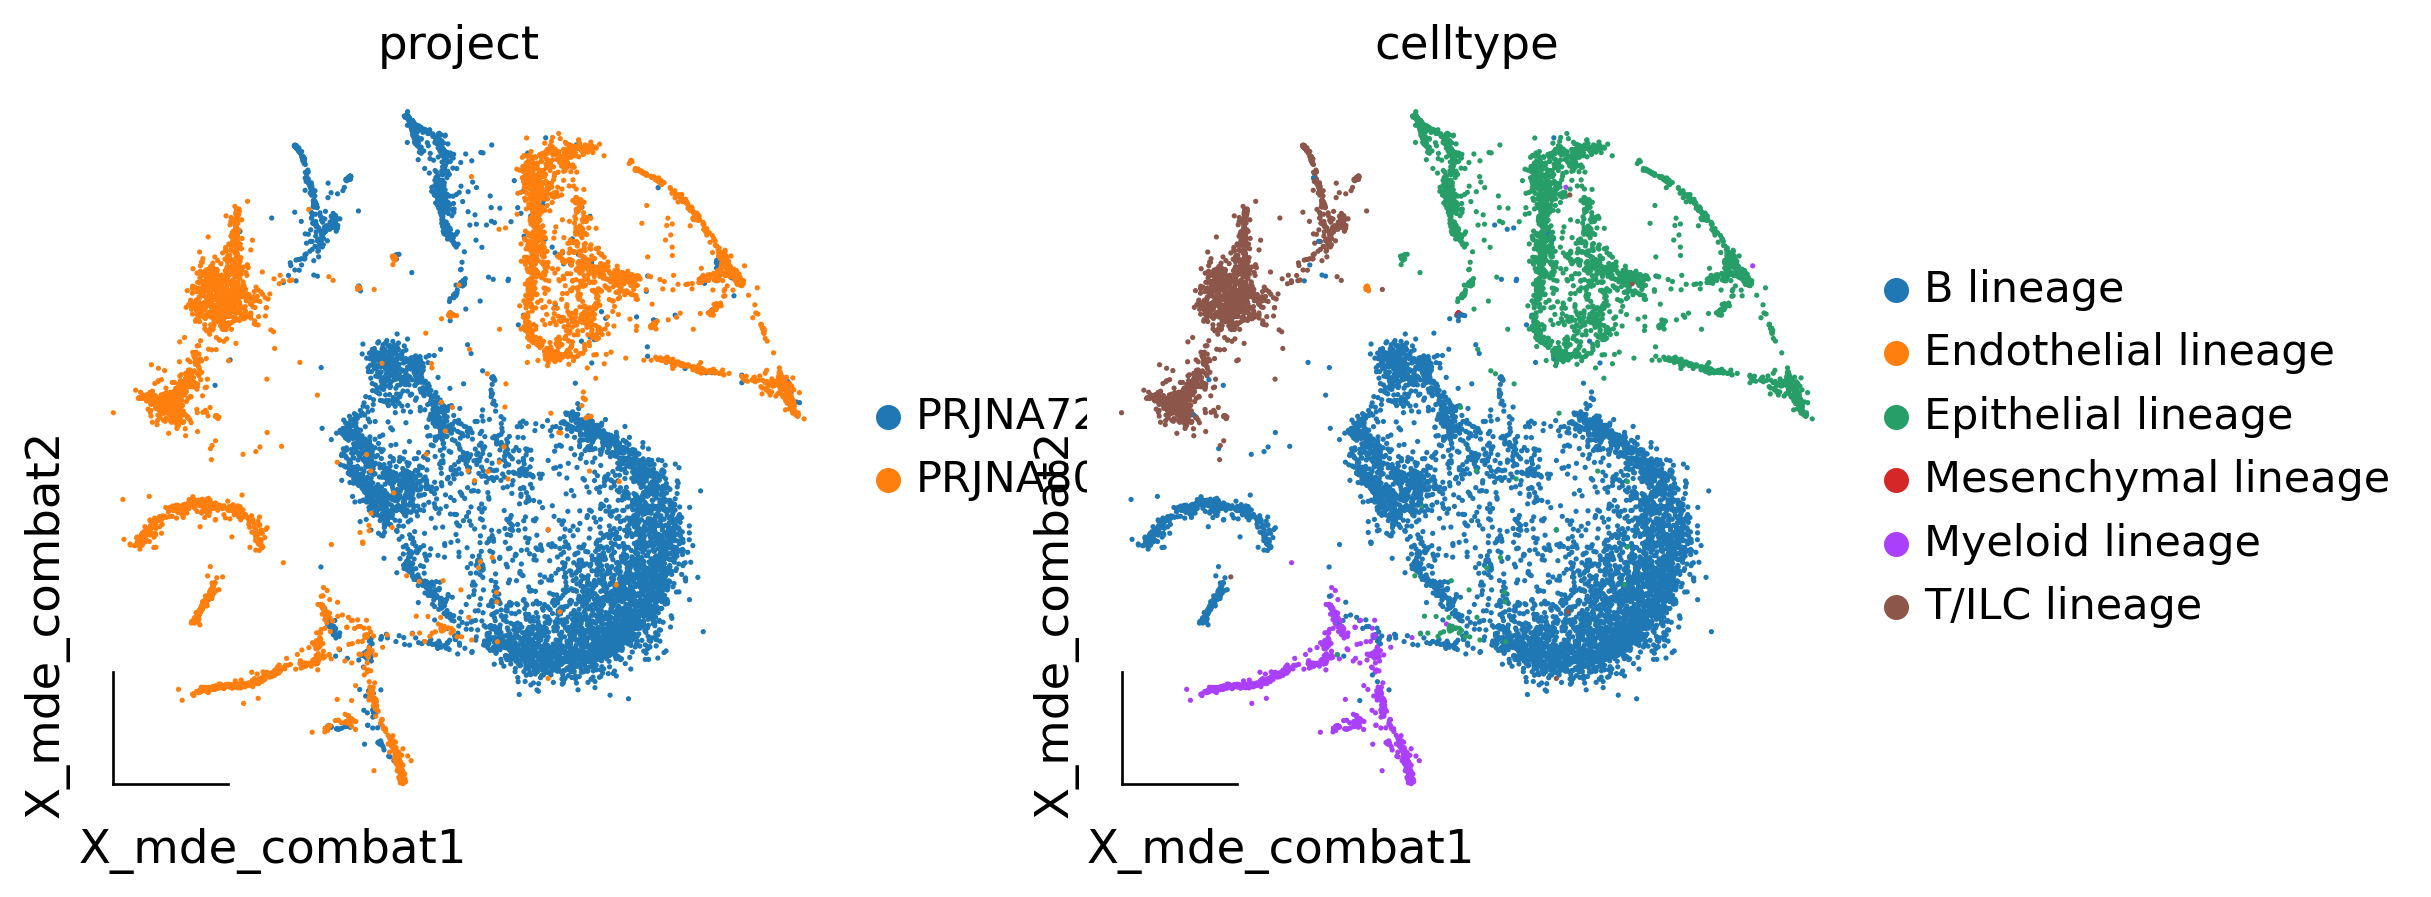

In [6]:
adata_combat=ov.single.batch_correction(adata,batch_key='project',
                                        methods='combat',n_pcs=30)
adata.obsm["X_mde_combat"] = ov.utils.mde(adata.obsm["X_combat"])
ov.utils.embedding(adata,
                basis='X_mde_combat',frameon='small',
                color=['project','celltype'],show=False)

...Begin using harmony to correct batch effect


2023-08-15 13:27:43,478 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-08-15 13:28:01,448 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-08-15 13:28:01,531 - harmonypy - INFO - Iteration 1 of 10
2023-08-15 13:28:07,660 - harmonypy - INFO - Iteration 2 of 10
2023-08-15 13:28:13,257 - harmonypy - INFO - Iteration 3 of 10
2023-08-15 13:28:21,678 - harmonypy - INFO - Iteration 4 of 10
2023-08-15 13:28:29,082 - harmonypy - INFO - Converged after 4 iterations


[<AxesSubplot: title={'center': 'project'}, xlabel='X_mde_harmony1', ylabel='X_mde_harmony2'>,
 <AxesSubplot: title={'center': 'celltype'}, xlabel='X_mde_harmony1', ylabel='X_mde_harmony2'>]

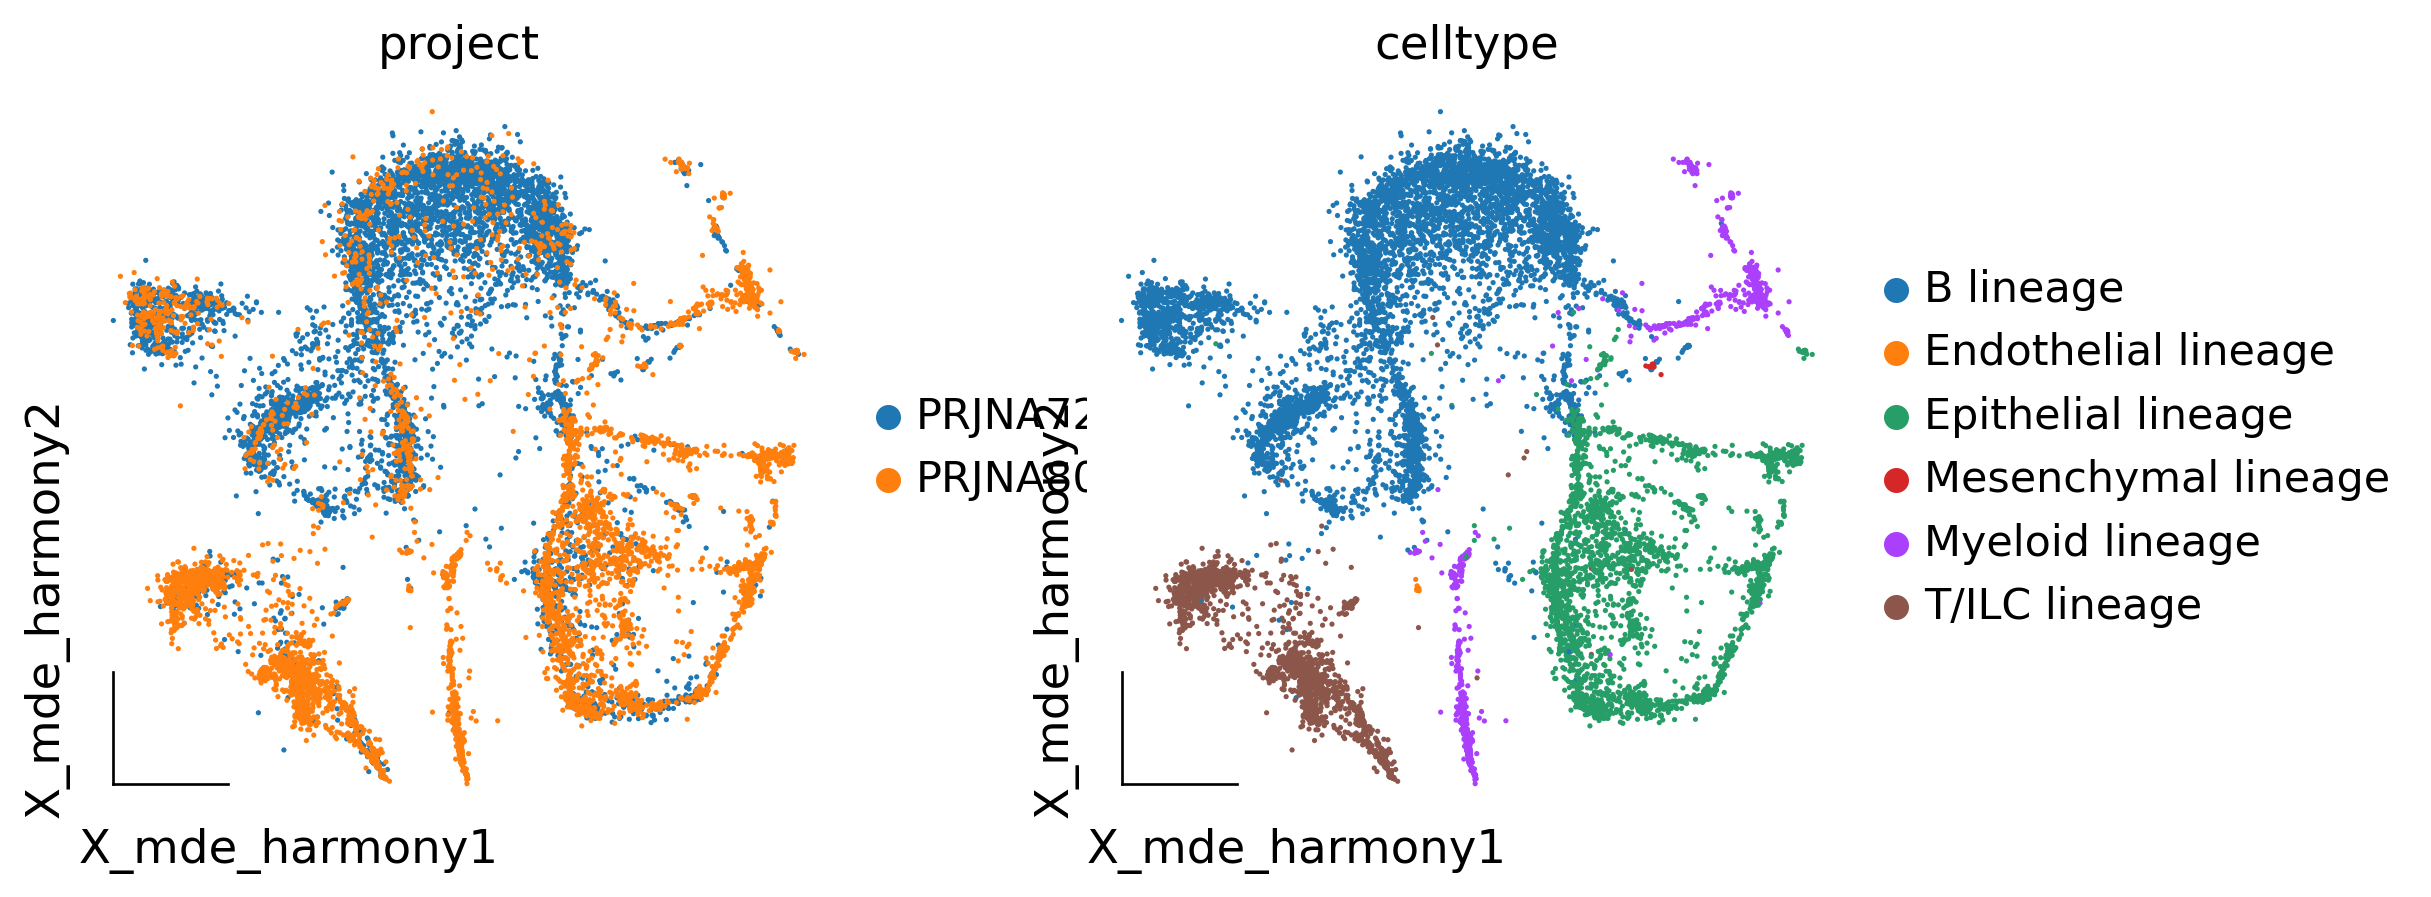

In [7]:
adata_harmony=ov.single.batch_correction(adata,batch_key='project',
                                        methods='harmony',n_pcs=30)
adata.obsm["X_mde_harmony"] = ov.utils.mde(adata.obsm["X_harmony"])
ov.utils.embedding(adata,
                basis='X_mde_harmony',frameon='small',
                color=['project','celltype'],show=False)

In [ ]:
!cd /disk212/yupf/database/scRNA-seq/benchmark
!python Tomatrix.py --h5ad /disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scib_redo/adata.h5ad -o /disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scib_redo/seurat_mtx>Tomatrix.log 2>&1 &

In [ ]:
cd /disk212/yupf/database/scRNA-seq/benchmark/third_parties
nohup python BBKNN.py --h5ad /disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scib_redo/adata.h5ad -o /disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scib_redo/bbknn>bbknn.log 2>&1 &
nohup python Scanorama.py --h5ad /disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scib_redo/adata.h5ad -o /disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scib_redo/scanorama>scanorama.log 2>&1 &
nohup python scVI.py --h5ad /disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scib_redo/adata.h5ad -o /disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scib_redo/scVI >scVI.log 2>&1 &
nohup Rscript Seurat_v3.R -i /disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scib_redo/seurat_mtx -o /disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scib_redo/Seurat_v3 >seurat_v3.log 2>&1 &
nohup Rscript FastMNN.R -i /disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scib_redo/seurat_mtx -o /disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scib_redo/FastMNN >FastMNN.log 2>&1 &

In [10]:
# adata_bbknn=sc.read_h5ad('/disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/bbknn/adata.h5ad')

adata_fastmnn=sc.read_h5ad('/disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scib_redo/FastMNN/adata.h5ad')

adata_scanorama=sc.read_h5ad('/disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scib_redo/scanorama/adata.h5ad')
# adata_scvi=sc.read_h5ad('/disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scVI/adata.h5ad')
adata_seurat=sc.read_h5ad('/disk212/yupf/database/scRNA-seq/paperdata/1_atlas/batcheffect/scib_redo/Seurat_v3/adata.h5ad')

In [11]:
adata

AnnData object with n_obs × n_vars = 12237 × 3000
    obs: 'doublet_scores', 'predicted_doublets', 'project', 'sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'celltype', 'batch'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'dispersions', 'dispersions_norm', 'percent_cells', 'robust', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features'
    uns: 'batch_colors', 'celltype_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'project_colors', 'umap', 'layers_counts'
    obsm: 'X_pca', 'X_umap', 'X_combat', 'X_mde_combat', 'X_harmony', 'X_mde_harmony'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [17]:
adata_seurat

AnnData object with n_obs × n_vars = 11015 × 16810
    obs: 'nCount_RNA', 'nFeature_RNA', 'celltype', 'batch'
    var: 'name'
    obsm: 'X_pca', 'X_umap'

In [15]:
adata=adata[adata.obs_names.isin(adata_fastmnn.obs_names)]

In [18]:
adata.obsm['X_FastMNN']=adata_fastmnn.obsm['X_mnn']
adata.obsm['X_scanorama']=adata_scanorama.obsm['X_scanorama']
adata.obsm['X_Seurat_v3']=adata_seurat.obsm['X_umap']

In [20]:
from scib_metrics.benchmark import Benchmarker
bm = Benchmarker(
    adata,
    batch_key="batch",
    label_key="celltype",
    embedding_obsm_keys=[ "X_harmony",'X_FastMNN',
                         'X_scanorama','X_Seurat_v3','X_combat'],
    n_jobs=8,
)
bm.benchmark()

Embeddings: 100%|██████████| 5/5 [02:54<00:00, 34.84s/it]


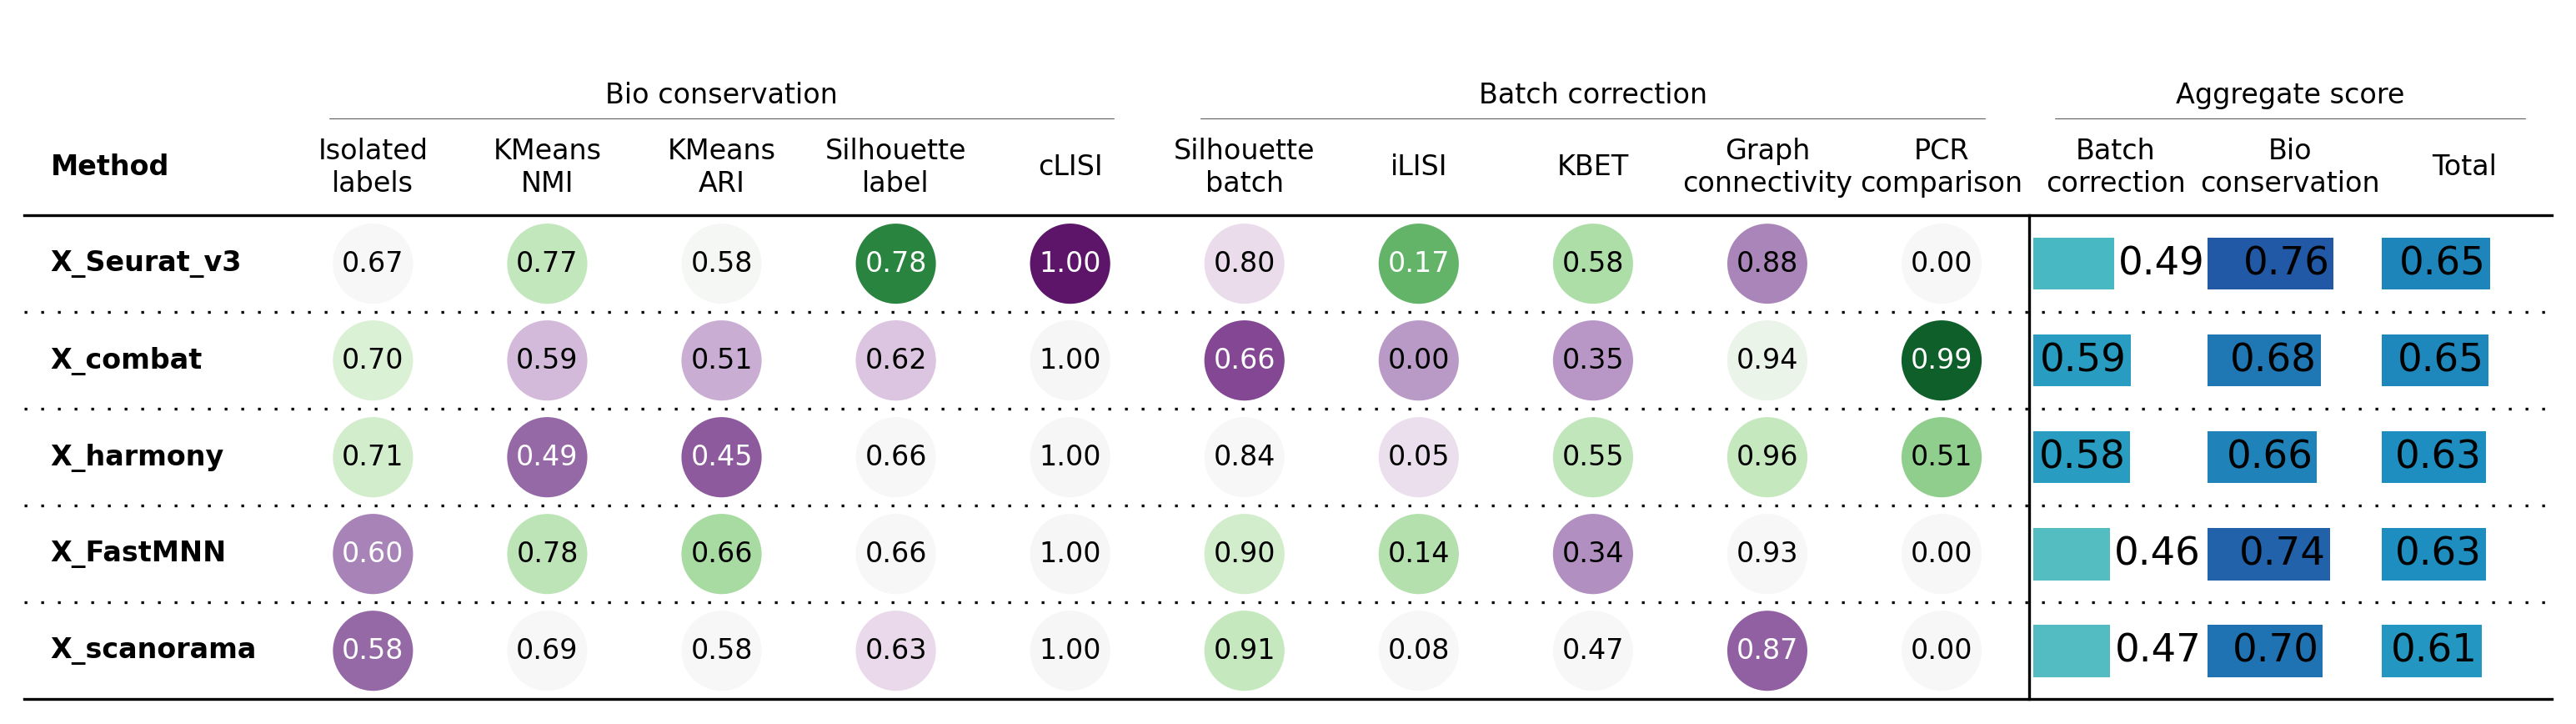

In [21]:
bm.plot_results_table(min_max_scale=False)